**Intro: Installing and importing packages needed and data**

In [2]:
!pip install numpy
!pip install pandas
!pip install matplotlib
!pip install seaborn
!pip install textwrap
!pip install datetime

ERROR: Could not find a version that satisfies the requirement textwrap (from versions: none)
ERROR: No matching distribution found for textwrap


Now, we import the necessary packages: Pandas to deal with data manipulation and tables; Seaborn and Matplotlib for Data visualisation; Numpy for calculations and textwrap for text format. 

In [22]:
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
import numpy as np
from textwrap import wrap
import datetime

**Assigning the data and checking**


Now we import the dataset from the GitHub repository. This is the longest step on the notebook. After this, everything goes fast.


In [23]:
#This will take a minute. Afer this, everything is really fast. 
online_data = pd.read_csv("https://raw.githubusercontent.com/Growth-Tribe/online-retail/master/data.csv",delimiter=",",encoding = 'unicode_escape')

In [24]:
#We store our data on main_df, which stands for main data frame. 
#We also create a column with the total price of the order. If you look at the third instruction, you will
#notice that to compute the total, we simply multiply the quantity of items time the price of those items. 
main_df = online_data
main_df.columns = ['invoice_no','stock_code','description','quantity','invoice_date','unit_price', 'cust_id','country']
main_df['tot_order'] = main_df['quantity']*main_df['unit_price']
main_df.head()

,invoice_no,stock_code,description,quantity,invoice_date,unit_price,cust_id,country,tot_order
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom,20.34


In [25]:
#Checking there is around half a million rows and 9 columns
main_df.shape

(541909, 9)

In [33]:
#converting "invoice_date" to datetime object
main_df["invoice_date"] = pd.to_datetime(main_df["invoice_date"])

**1 Creating label for invoice period**

In [34]:
#From the invoice data, we're going to extract the month, which is the cohort in this case. 
#As ouput, you will see a table whose last column is invoice_period, e.g. 2011-01

main_df['invoice_period'] = main_df['invoice_date'].apply(lambda x: x.strftime('%Y-%m'))
main_df.head()

,invoice_no,stock_code,description,quantity,invoice_date,unit_price,cust_id,country,tot_order,invoice_period
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30,2010-12
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,2010-12
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00,2010-12
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,2010-12
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,2010-12


In [35]:
#Here we are grouping all the bills into cohorts. Basically, putting them
#within the month they took place
invoice_period_grouped = main_df.groupby('invoice_period')
invoice_period_agg = invoice_period_grouped.agg({'cust_id': pd.Series.nunique,
                       'description': pd.Series.nunique,
                      'quantity': np.sum,
                      'tot_order': np.sum})
invoice_period_agg.rename(columns ={'cust_id':'total_customers',
                         'description':'total_product_types',
                        'quantity':'total_units'}, inplace = True)
invoice_period_agg

,total_customers,total_product_types,total_units,tot_order
invoice_period,,,,
2010-12,948.0,2760,342228,748957.020
2011-01,783.0,2566,308966,560000.260
2011-02,798.0,2372,277989,498062.650
2011-03,1020.0,2506,351872,683267.080
2011-04,899.0,2456,289098,493207.121
2011-05,1079.0,2480,380391,723333.510
2011-06,1051.0,2639,341623,691123.120
2011-07,993.0,2693,391116,681300.111
2011-08,980.0,2609,406199,682680.510


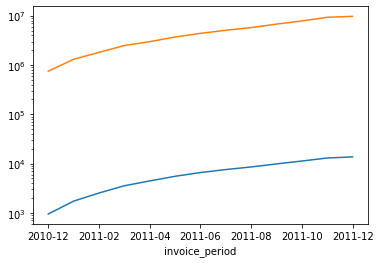

In [36]:
#In this graph, we can see the total number of customers and the total of their orders with respect to time
ax = invoice_period_agg['total_customers'].cumsum().plot()
ax2 = invoice_period_agg['tot_order'].cumsum().plot()
ax.set_yscale('log')

**2 Creating a label for customer cohort group**

In [37]:
main_df.set_index('cust_id', inplace = True)
main_df.head()

,invoice_no,stock_code,description,quantity,invoice_date,unit_price,country,tot_order,invoice_period
cust_id,,,,,,,,,
17850.0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,United Kingdom,15.30,2010-12
17850.0,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,United Kingdom,20.34,2010-12
17850.0,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,United Kingdom,22.00,2010-12
17850.0,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,United Kingdom,20.34,2010-12
17850.0,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,United Kingdom,20.34,2010-12


In [38]:
#Here we label every entry with its corresponding cohort group
main_df['cohort_group'] = main_df.groupby(level=0)['invoice_date'].min().apply(lambda x: x.strftime('%Y-%m'))
main_df.head()

,invoice_no,stock_code,description,quantity,invoice_date,unit_price,country,tot_order,invoice_period,cohort_group
cust_id,,,,,,,,,,
17850.0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,United Kingdom,15.30,2010-12,2010-12
17850.0,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,United Kingdom,20.34,2010-12,2010-12
17850.0,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,United Kingdom,22.00,2010-12,2010-12
17850.0,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,United Kingdom,20.34,2010-12,2010-12
17850.0,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,United Kingdom,20.34,2010-12,2010-12


In [39]:
main_df.reset_index(inplace = True)
main_df.head()

,cust_id,invoice_no,stock_code,description,quantity,invoice_date,unit_price,country,tot_order,invoice_period,cohort_group
0,17850.0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,United Kingdom,15.30,2010-12,2010-12
1,17850.0,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,United Kingdom,20.34,2010-12,2010-12
2,17850.0,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,United Kingdom,22.00,2010-12,2010-12
3,17850.0,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,United Kingdom,20.34,2010-12,2010-12
4,17850.0,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,United Kingdom,20.34,2010-12,2010-12


**3 Aggregate metrics across cohort groups and invoice periods**

Now that we know the label for every transaction, plus the customer Ids, we can group together the users per cohort. 

In [40]:
grouped = main_df.groupby(['cohort_group','invoice_period'])
cohorts = grouped.agg({'cust_id': pd.Series.nunique,
                       'description': pd.Series.nunique,
                      'quantity': np.sum,
                      'tot_order': np.sum})
cohorts.rename(columns ={'cust_id':'total_customers',
                         'description':'total_product_types',
                        'quantity':'total_units'}, inplace = True)
cohorts.head()

total_customers  ...  tot_order
cohort_group invoice_period                   ...           
2010-12      2010-12                   948.0  ...  554604.02
             2011-01                   362.0  ...  271616.52
             2011-02                   317.0  ...  230856.22
             2011-03                   367.0  ...  302509.39
             2011-04                   341.0  ...  200927.98

[5 rows x 4 columns]

**4 Creating a label for invoice period within cohort groups**

Here we're just going to assign numbers 1,2,3, etc. for teh cohorts, starting on 2010-12

In [41]:
def cohort_period(df):
    df['cohort_period'] = np.arange(len(df)) + 1
    return df

cohorts = cohorts.groupby(level=0).apply(cohort_period)
cohorts.head()

total_customers  ...  cohort_period
cohort_group invoice_period                   ...               
2010-12      2010-12                   948.0  ...              1
             2011-01                   362.0  ...              2
             2011-02                   317.0  ...              3
             2011-03                   367.0  ...              4
             2011-04                   341.0  ...              5

[5 rows x 5 columns]

**Sales across cohorts**

These two last commands bring us the most important results: first, the sales across cohorts, and then the numbers of users that keep coming back every month from those cohorts.

Text(0.5, 1.0, 'Monthly Total Sales Across Cohorts')

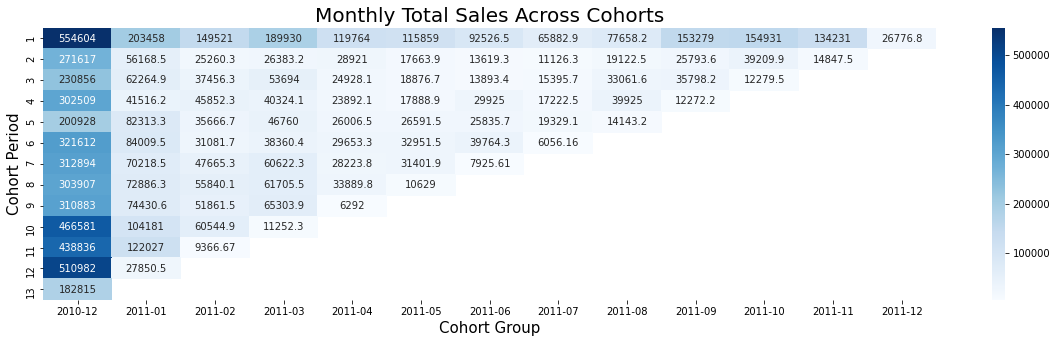

In [42]:
cohorts.reset_index(inplace=True)
cohorts.set_index(['cohort_group', 'cohort_period'], inplace=True)

unstacked_order = cohorts['tot_order'].unstack(0)
plt.figure(figsize=(20,5))
ax = sb.heatmap(unstacked_order, annot=True,cmap='Blues', fmt='g')
ax.set_ylabel('Cohort Period', fontsize = 15)
ax.set_xlabel('Cohort Group', fontsize = 15)
ax.set_title('Monthly Total Sales Across Cohorts', fontsize = 20)

Text(0.5, 1.0, 'Monthly Active Customers Across Cohorts')

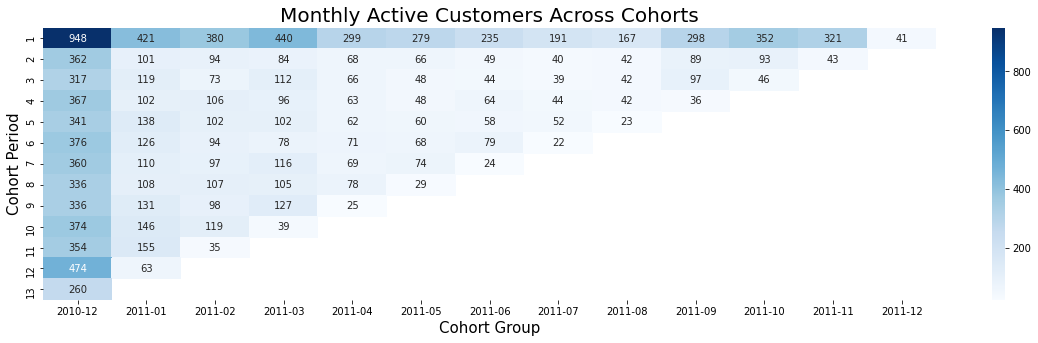

In [43]:
unstacked_cust = cohorts['total_customers'].unstack(0)
plt.figure(figsize=(20,5))
ax = sb.heatmap(unstacked_cust, annot = True, cmap='Blues', fmt = 'g')
ax.set_ylabel('Cohort Period', fontsize = 15)
ax.set_xlabel('Cohort Group', fontsize = 15)
ax.set_title('Monthly Active Customers Across Cohorts', fontsize = 20)